In [147]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime, date
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [148]:
# loading the New customer data from 'NewCustomerList' sheet on Raw_data excel file.

new_cust = pd.read_excel("Raw_data.xlsx", sheet_name= 'NewCustomerList')

In [149]:
# checking first 5 rows using .head() from New customer Data.

new_cust.head(5)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.81,1.0125,1.265625,1.075781,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.75,0.7500,0.937500,0.796875,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.71,0.7100,0.710000,0.710000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.50,0.6250,0.625000,0.625000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.99,0.9900,1.237500,1.237500,4,4,1.703125


In [150]:
# information of the columns and data-types of New customer data.
new_cust.info()

#or

#new_cust.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

Data types are fine for the feature columns but 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20' are non relevent and should be dropped.

In [151]:
print("Total rows(records) in the dataset : {}".format(new_cust.shape[0]))
print("Total columns(features) in the dataset : {}".format(new_cust.shape[1]))

#or

#new_cust.shape

Total rows(records) in the dataset : 1000
Total columns(features) in the dataset : 23


In [152]:
new_cust.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,0.747270,0.839145,0.944456,0.872373,498.819000,498.819000,0.881714
std,27.796686,5.037145,848.895767,2.758804,0.210585,0.254564,0.306850,0.293649,288.810997,288.810997,0.293525
min,0.000000,0.000000,2000.000000,1.000000,0.400000,0.400000,0.400000,0.340000,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,0.560000,0.620000,0.700000,0.648125,250.000000,250.000000,0.649531
50%,51.000000,11.000000,2800.000000,8.000000,0.750000,0.825000,0.920000,0.839375,500.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,0.930000,1.040000,1.156250,1.075000,750.250000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1.100000,1.375000,1.718750,1.718750,1000.000000,1000.000000,1.718750


In [153]:
new_cust.describe(include= 'object')

,first_name,last_name,gender,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,address,state,country
count,1000,971,1000,894,835,1000,1000,1000,1000,1000,1000
unique,940,961,3,184,9,3,1,2,1000,3,1
top,Rozamond,Sissel,Female,Associate Professor,Financial Services,Mass Customer,N,No,45 Shopko Center,NSW,Australia
freq,3,2,513,15,203,508,1000,507,1,506,1000


In [154]:
# check for columns with numeric and non-numeric values.

#numeric columns
df_numeric= new_cust.select_dtypes(include=[np.number])
numeric_cols= df_numeric.columns.values
print("The numeric columns are :")
print(numeric_cols)

#non-numeric columns

df_non_numeric = new_cust.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print("The non-numeric columns are :")
print(non_numeric_cols)

The numeric columns are :
['past_3_years_bike_related_purchases' 'tenure' 'postcode'
 'property_valuation' 'Unnamed: 16' 'Unnamed: 17' 'Unnamed: 18'
 'Unnamed: 19' 'Unnamed: 20' 'Rank' 'Value']
The non-numeric columns are :
['first_name' 'last_name' 'gender' 'DOB' 'job_title'
 'job_industry_category' 'wealth_segment' 'deceased_indicator' 'owns_car'
 'address' 'state' 'country']


# 1. Dropping Irrelevant columns

  **Unnamed: 16, Unnamed: 17, Unnamed: 18, Unnamed: 19, Unnamed: 20** are irrelevant columns.

In [155]:
#Drop the irrelevant columns from dataset

new_cust.drop(labels=['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
 'Unnamed: 19', 'Unnamed: 20' ], axis=1, inplace= True)

In [156]:
# Check if irrelevant columns are dropped
new_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

#2. Checking for the missing values


In [157]:
# Total number of missing values

new_cust.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [158]:
#percentage of missing values

new_cust.isnull().mean()*100

first_name                              0.0
last_name                               2.9
gender                                  0.0
past_3_years_bike_related_purchases     0.0
DOB                                     1.7
job_title                              10.6
job_industry_category                  16.5
wealth_segment                          0.0
deceased_indicator                      0.0
owns_car                                0.0
tenure                                  0.0
address                                 0.0
postcode                                0.0
state                                   0.0
country                                 0.0
property_valuation                      0.0
Rank                                    0.0
Value                                   0.0
dtype: float64

<Axes: >

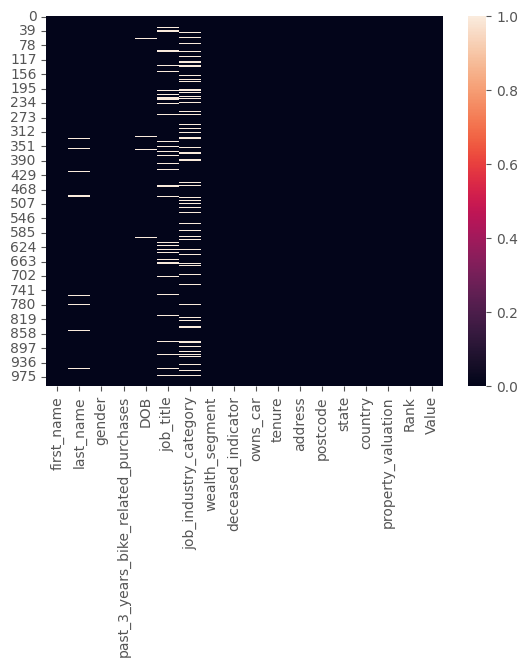

In [159]:
#checking missing value with heatmap

sns.heatmap(new_cust.isnull())

## 2.1 null values in 'last_name'

In [160]:
#checking for the condition where 'last_name' is null if 'first_name' is also null

new_cust[new_cust['last_name'].isnull()][['first_name']].isnull().sum()

first_name    0
dtype: int64

In [161]:
new_cust[new_cust['last_name'].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
12,Olag,NaN,Male,60,1990-05-13,Human Resources Manager,Telecommunications,Mass Customer,N,No,9,0484 North Avenue,2032,NSW,Australia,11,13,1.609375
58,Whittaker,NaN,Male,64,1966-07-29,Media Manager III,NaN,Mass Customer,N,Yes,8,683 Florence Way,3156,VIC,Australia,5,57,1.375000
87,Kahaleel,NaN,Male,5,1942-11-01,GIS Technical Architect,NaN,High Net Worth,N,No,13,12 Arapahoe Park,2035,NSW,Australia,12,88,1.314844
155,Bill,NaN,Female,74,1963-04-24,Human Resources Assistant II,Property,Mass Customer,N,Yes,19,6704 Pine View Lane,2170,NSW,Australia,9,155,1.200000
202,Glyn,NaN,Male,47,1945-02-13,General Manager,Manufacturing,Affluent Customer,N,Yes,21,67 Bluejay Plaza,2300,NSW,Australia,9,202,1.140625
326,Haleigh,NaN,Female,17,1952-05-19,Senior Sales Associate,Financial Services,Mass Customer,N,Yes,18,49 Jana Point,4503,QLD,Australia,4,326,1.009375
330,Alon,NaN,Male,17,1999-06-23,Accountant IV,NaN,Affluent Customer,N,No,9,770 Crest Line Parkway,4218,QLD,Australia,3,329,1.000000
357,Otis,NaN,Male,59,1971-01-11,Electrical Engineer,Manufacturing,Affluent Customer,N,No,12,04 Oakridge Plaza,2075,NSW,Australia,11,358,0.980000
419,Sherill,NaN,Female,33,1991-12-18,Information Systems Manager,Financial Services,Mass Customer,N,No,3,53 Moulton Avenue,2880,NSW,Australia,1,420,0.913750
442,Theresina,NaN,Female,30,1987-03-01,General Manager,Argiculture,Mass Customer,N,Yes,14,253 Katie Junction,2650,NSW,Australia,2,441,0.901000


Since all customers have a first name, all the customers are identifiable. So it is okay not to have a last name.

In [162]:
#filling null values of 'last_name' with 'None'

new_cust['last_name'].fillna('None', axis=0, inplace= True)

In [163]:
new_cust['last_name'].isnull().sum()

0

##2.2 null values in 'DOB'

In [164]:
new_cust[new_cust['DOB'].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
59,Normy,Goodinge,U,5,NaT,Associate Professor,IT,Mass Customer,N,No,4,7232 Fulton Parkway,3810,VIC,Australia,5,57,1.375000
226,Hatti,Carletti,U,35,NaT,Legal Assistant,IT,Affluent Customer,N,Yes,11,6 Iowa Center,2519,NSW,Australia,9,226,1.112500
324,Rozamond,Turtle,U,69,NaT,Legal Assistant,IT,Mass Customer,N,Yes,3,57025 New Castle Street,3850,VIC,Australia,3,324,1.010000
358,Tamas,Swatman,U,65,NaT,Assistant Media Planner,Entertainment,Affluent Customer,N,No,5,78 Clarendon Drive,4551,QLD,Australia,8,358,0.980000
360,Tracy,Andrejevic,U,71,NaT,Programmer II,IT,Mass Customer,N,Yes,11,5675 Burning Wood Trail,3030,VIC,Australia,7,361,0.977500
374,Agneta,McAmish,U,66,NaT,Structural Analysis Engineer,IT,Mass Customer,N,No,15,5773 Acker Way,4207,QLD,Australia,6,375,0.960000
434,Gregg,Aimeric,U,52,NaT,Internal Auditor,IT,Mass Customer,N,No,7,72423 Surrey Street,3753,VIC,Australia,5,433,0.906250
439,Johna,Bunker,U,93,NaT,Tax Accountant,IT,Mass Customer,N,Yes,14,3686 Waubesa Way,3065,VIC,Australia,6,436,0.903125
574,Harlene,Nono,U,69,NaT,Human Resources Manager,IT,Mass Customer,N,No,12,0307 Namekagon Crossing,2170,NSW,Australia,7,575,0.796875
598,Gerianne,Kaysor,U,15,NaT,Project Manager,IT,Affluent Customer,N,No,5,882 Toban Lane,2121,NSW,Australia,11,599,0.775000


In [165]:
round(new_cust['DOB'].isnull().mean()*100)

2

We have less than 5% data with null DOB, so we can remove the record where DOB is null.

In [166]:
dob_index_drop = new_cust[new_cust['DOB'].isnull()].index
dob_index_drop

Int64Index([ 59, 226, 324, 358, 360, 374, 434, 439, 574, 598, 664, 751, 775,
            835, 883, 904, 984],
           dtype='int64')

In [167]:
new_cust.drop(index=dob_index_drop, axis=0, inplace= True)

In [168]:
new_cust['DOB'].isnull().sum()

0

Now there are no null values in DOB

## 2.3 Job Title

In [169]:
#Fetch records where Job title is missing.

new_cust[new_cust['job_title'].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
15,Dukie,Swire,Male,88,1954-03-31,NaN,Manufacturing,Affluent Customer,N,Yes,5,64 Granby Parkway,2500,NSW,Australia,8,16,1.562500
25,Rourke,Gillbard,Male,11,1945-08-03,NaN,Property,Mass Customer,N,No,17,75 Cordelia Trail,4817,QLD,Australia,4,26,1.468750
29,Rhona,De Freyne,Female,45,1960-11-22,NaN,Health,High Net Worth,N,No,8,11184 East Drive,3056,VIC,Australia,10,30,1.460938
30,Sharron,Claibourn,Female,62,1980-01-26,NaN,Financial Services,High Net Worth,N,Yes,17,555 Hermina Avenue,2280,NSW,Australia,8,30,1.460938
37,Mitchell,MacCague,Male,58,1979-04-11,NaN,Manufacturing,Mass Customer,N,No,15,240 Acker Avenue,3190,VIC,Australia,8,38,1.437500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,Candy,None,Female,23,1977-12-08,NaN,Financial Services,Mass Customer,N,No,6,59252 Maryland Drive,3500,VIC,Australia,3,951,0.450500
953,Noami,Cokly,Female,74,1962-09-17,NaN,Manufacturing,Mass Customer,N,Yes,15,2886 Buena Vista Terrace,2038,NSW,Australia,11,954,0.450000
971,Frieda,Tavinor,Female,43,1999-03-04,NaN,NaN,Affluent Customer,N,No,10,7 Mallory Lane,3064,VIC,Australia,6,972,0.430000
972,Ellwood,Budden,Male,82,1998-06-03,NaN,Health,Mass Customer,N,Yes,11,79907 Randy Center,2192,NSW,Australia,10,972,0.430000


In [170]:
round(new_cust['job_title'].isnull().mean()*100)

11

In this case the missing values for job title is 11%. so we will replace the null values with Missing

In [171]:
new_cust['job_title'].nunique

<bound method IndexOpsMixin.nunique of 0                   General Manager
1               Structural Engineer
2            Senior Cost Accountant
3        Account Representative III
4                 Financial Analyst
                   ...             
995                       Paralegal
996          Senior Sales Associate
997    Budget/Accounting Analyst IV
998               Financial Advisor
999             Staff Accountant IV
Name: job_title, Length: 983, dtype: object>

In [172]:
job_title_mode = new_cust['job_title'].mode()[0]
new_cust['job_title'].fillna('job_title_mode', axis= 0, inplace= True)

In [173]:
new_cust['job_title'].isnull().sum()

0

Now there are no missing values for the job title column

##2.4. Job Industry Category

In [174]:
#Fetch records where Job Industry is missing.
new_cust[new_cust['job_industry_category'].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
22,Otis,Ottey,Male,26,1998-02-05,Quality Engineer,NaN,Mass Customer,N,No,3,1562 Merchant Street,4744,QLD,Australia,4,23,1.500000
23,Tabbatha,Averill,Female,5,1977-12-17,Quality Control Specialist,NaN,Affluent Customer,N,Yes,13,663 8th Parkway,2257,NSW,Australia,8,23,1.500000
33,Mikel,McNess,Male,71,1981-09-22,Nurse,NaN,Mass Customer,N,No,9,3 Pleasure Drive,4122,QLD,Australia,9,32,1.453125
36,Farlie,Petford,Male,76,1968-03-25,Recruiting Manager,NaN,High Net Worth,N,No,13,2330 Butternut Trail,2017,NSW,Australia,10,36,1.447656
43,Corinna,Suggey,Female,52,1966-09-18,Design Engineer,NaN,Affluent Customer,N,No,9,938 Ilene Road,2761,NSW,Australia,8,44,1.421094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,Blondell,Dibdall,Female,62,1967-01-03,Programmer III,NaN,Mass Customer,N,No,4,34 Bunting Pass,3048,VIC,Australia,4,960,0.442000
971,Frieda,Tavinor,Female,43,1999-03-04,job_title_mode,NaN,Affluent Customer,N,No,10,7 Mallory Lane,3064,VIC,Australia,6,972,0.430000
975,Amby,Bodega,Male,63,1968-06-12,Recruiter,NaN,Affluent Customer,N,Yes,17,669 Declaration Street,3810,VIC,Australia,6,974,0.425000
980,Tyne,Anshell,Female,71,1992-04-08,Mechanical Systems Engineer,NaN,Mass Customer,N,Yes,3,93 Sutherland Terrace,2560,NSW,Australia,8,979,0.416500


In [175]:
round(new_cust['job_industry_category'].isnull().mean()*100)

17

Here we have 17% missing values for job industry category column, so we can not replace them with job industry mode. That's why we will replace null values with **'Missing'**.

In [176]:
new_cust['job_industry_category'].fillna('Missing', axis= 0, inplace= True)

In [177]:
new_cust['job_industry_category'].isnull().sum()

0

No more null values in Job Industry Category.

Finally there are no missing values in dataset.

In [178]:
new_cust.isnull().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
dtype: int64

In [179]:
print("Total records after removing missing values : {}".format(new_cust.shape[0]))


#or

# new_cust.value_counts().sum()

Total records after removing missing values : 983


# 3. Inconsistency Check

Now checking for inconsistency in data.

We will check **'gender'**, **'wealth_segment'**, **'deceased_indicator'**, **'owns_car'** columns for the inconsistency.

## 3.1 Gender

In [180]:
new_cust['gender'].value_counts()

Female    513
Male      470
Name: gender, dtype: int64

There is no inconsistent data in gender

## 3.2 DOB

create an 'age' column to check for any further descripency in the data

In [181]:
# First changing DOB column in the datetime format:
new_cust['DOB']= pd.to_datetime(new_cust['DOB'])


# Creating a function to calculate the age as of today based on the DOB of the customer
def age(born):
  today= date.today()

  return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

new_cust['age']= new_cust['DOB'].apply(age)
print(new_cust['age'])

0      66
1      53
2      49
3      44
4      57
       ..
995    63
996    21
997    68
998    70
999    67
Name: age, Length: 983, dtype: int64


In [182]:
#Descriptive statistics of 'Age' column.

new_cust['age'].describe()

count    983.000000
mean      51.887080
std       17.085697
min       21.000000
25%       40.000000
50%       51.000000
75%       65.000000
max       85.000000
Name: age, dtype: float64

<Axes: xlabel='age'>

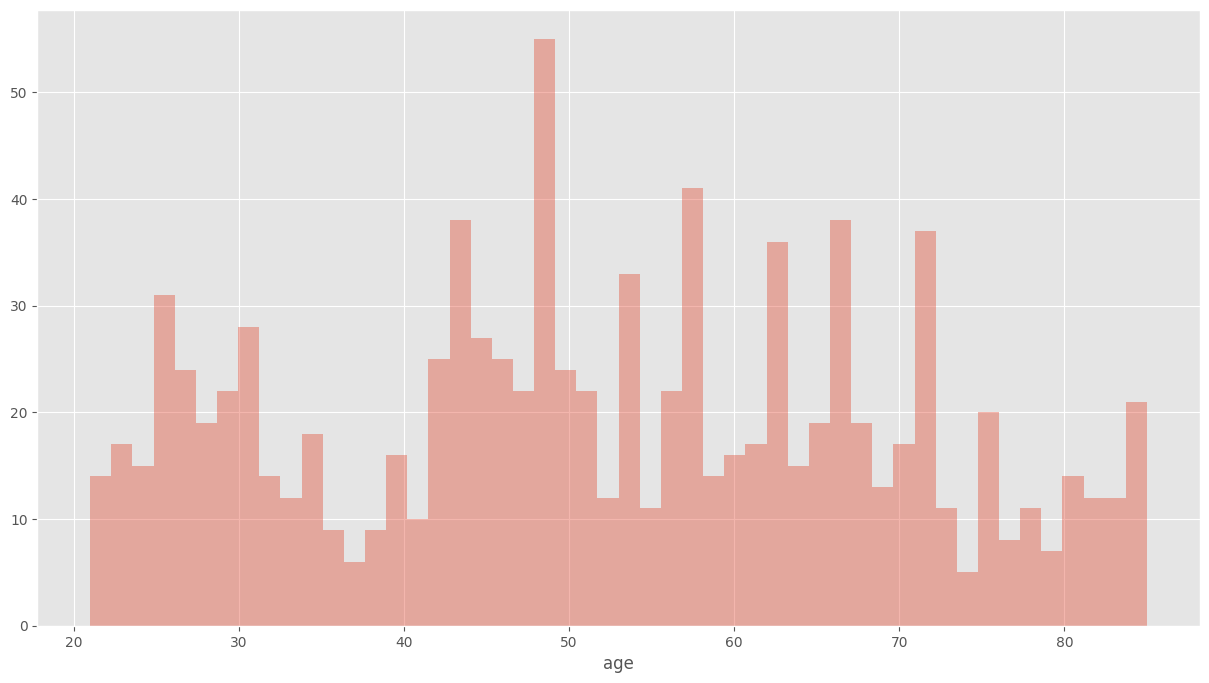

In [183]:
#visualise to find out the Age Distribution

plt.figure(figsize=(15,8))
sns.distplot(new_cust['age'], kde= False, bins= 50)

There is no descripency in the data visible from the visuals.

In [184]:
#Create an Age Group column for further analysis
new_cust['age_group'] = new_cust['age'].apply(lambda x : (math.floor(x/10)+1)*10)


#or just using basic arithmetic operations without importing math
#new_cust['age_group'] = (new_cust['age'] // 10 + 1) * 10

<Axes: xlabel='age_group'>

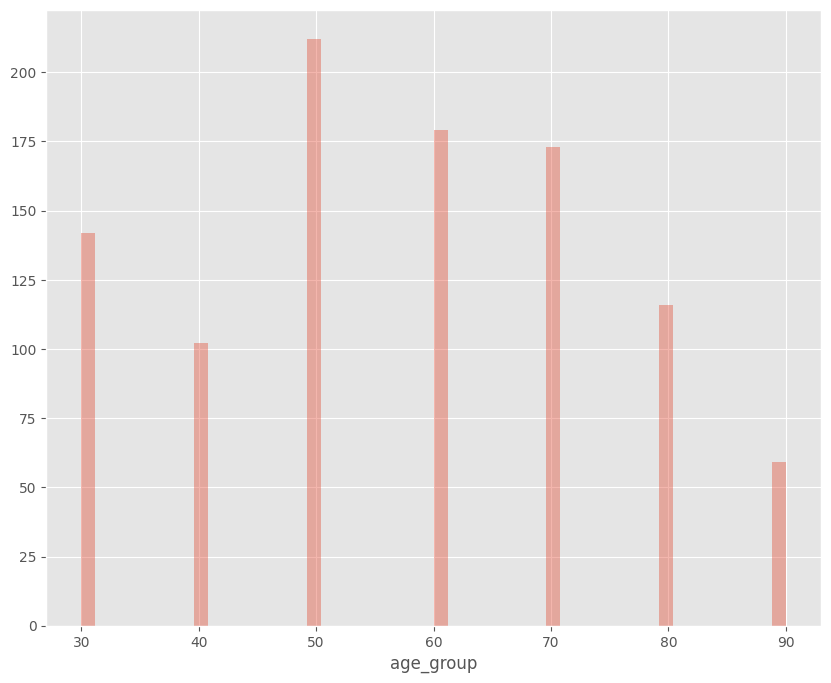

In [185]:
#visualise to find out the Age Group Distribution
plt.figure(figsize= (10,8))
sns.distplot(new_cust['age_group'], kde= False, bins= 50)

From the graph it is clear that the highest number of new customers are from age group of 50-59.

In [186]:
new_cust.head(10)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age,age_group
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,66,70
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,53,60
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,49,50
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,44,50
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,57,60
5,Druci,Brandli,Female,39,1951-04-29,Assistant Media Planner,Entertainment,High Net Worth,N,Yes,22,89105 Pearson Terrace,4075,QLD,Australia,7,6,1.671875,72,80
6,Rutledge,Hallt,Male,23,1976-10-06,Compensation Analyst,Financial Services,Mass Customer,N,No,8,7 Nevada Crossing,2620,NSW,Australia,7,6,1.671875,46,50
7,Nancie,Vian,Female,74,1972-12-27,Human Resources Assistant II,Retail,Mass Customer,N,Yes,10,85 Carioca Point,4814,QLD,Australia,5,8,1.656250,50,60
8,Duff,Karlowicz,Male,50,1972-04-28,Speech Pathologist,Manufacturing,Mass Customer,N,Yes,5,717 West Drive,2200,NSW,Australia,10,8,1.656250,51,60
9,Barthel,Docket,Male,72,1985-08-02,Accounting Assistant IV,IT,Mass Customer,N,Yes,17,80 Scofield Junction,4151,QLD,Australia,5,10,1.640625,38,40


## 3.3 Wealth Segment

In [187]:
new_cust['wealth_segment'].value_counts()

Mass Customer        499
High Net Worth       249
Affluent Customer    235
Name: wealth_segment, dtype: int64

There is no inconsistent data in Wealth segment

##3.4 Deceased indicator

In [188]:
new_cust['deceased_indicator'].value_counts()

N    983
Name: deceased_indicator, dtype: int64

There is no inconsistent data in Deceased indicator

##3.5 Owns car


In [189]:
new_cust['owns_car'].value_counts()

No     497
Yes    486
Name: owns_car, dtype: int64

There is no inconsistent data in Owns car column

##3.6 State

In [190]:
new_cust['state'].value_counts()

NSW    499
VIC    258
QLD    226
Name: state, dtype: int64

There is no inconsistent data in State column

##3.7 Country

In [191]:
new_cust['country'].value_counts()

Australia    983
Name: country, dtype: int64

There is no inconsistent data in Country column

##3.8 Tenure

In [192]:
new_cust['tenure'].describe()

count    983.000000
mean      11.459817
std        5.006123
min        1.000000
25%        8.000000
50%       11.000000
75%       15.000000
max       22.000000
Name: tenure, dtype: float64

There is no inconsistent data in Tenure column.

<Axes: xlabel='tenure', ylabel='Density'>

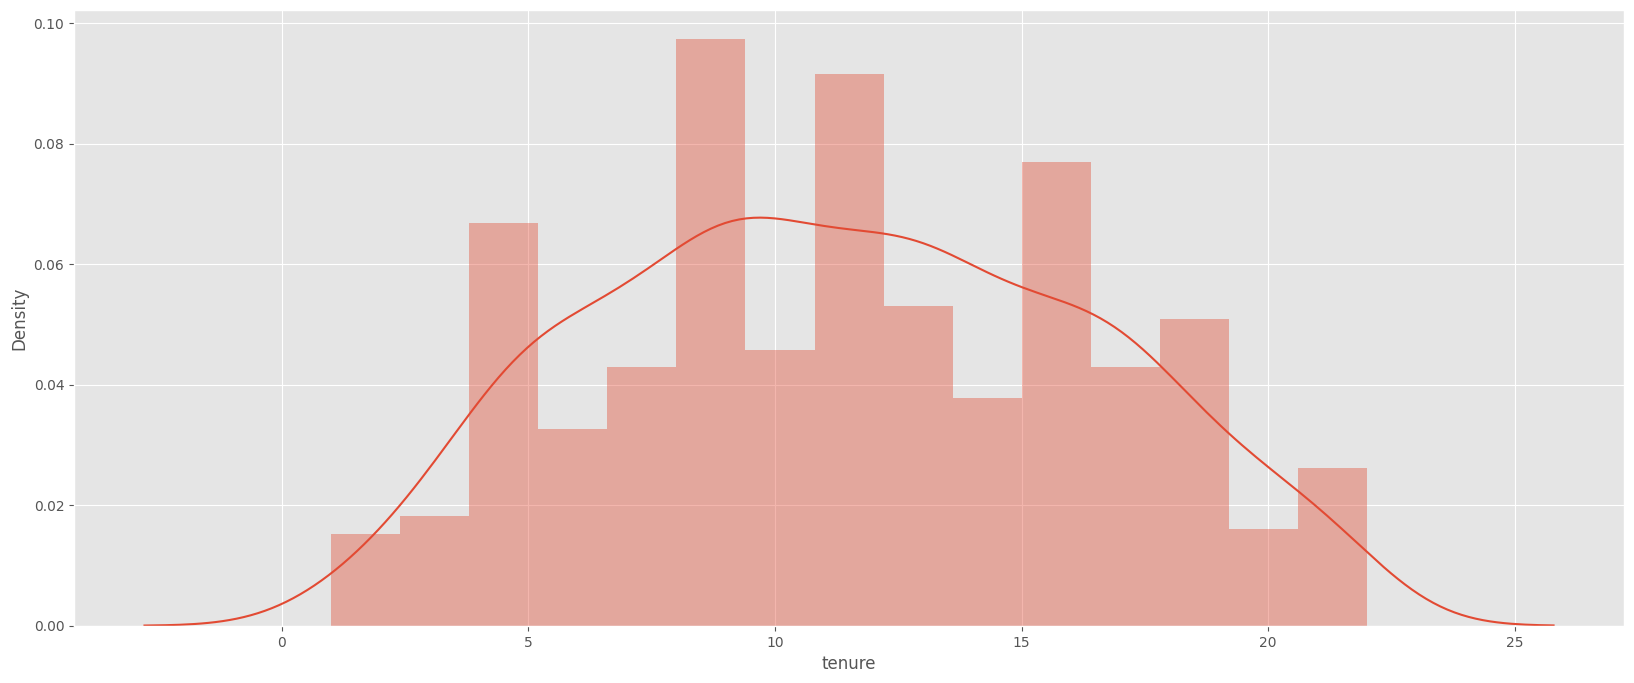

In [193]:
plt.figure(figsize= (20,8))
sns.distplot(new_cust['tenure'])

##3.9 Rest of the columns

In [194]:
new_cust[['address', 'postcode', 'state', 'country']]

,address,postcode,state,country
0,45 Shopko Center,4500,QLD,Australia
1,14 Mccormick Park,2113,NSW,Australia
2,5 Colorado Crossing,3505,VIC,Australia
3,207 Annamark Plaza,4814,QLD,Australia
4,115 Montana Place,2093,NSW,Australia
...,...,...,...,...
995,2 Sloan Way,2200,NSW,Australia
996,04 Union Crossing,2196,NSW,Australia
997,33475 Fair Oaks Junction,4702,QLD,Australia
998,57666 Victoria Way,4215,QLD,Australia


In [195]:
new_cust[['address', 'postcode', 'state', 'country']].sort_values('address')

,address,postcode,state,country
721,0 Bay Drive,2750,NSW,Australia
138,0 Dexter Parkway,2380,NSW,Australia
624,0 Emmet Trail,4128,QLD,Australia
300,0 Esker Avenue,4019,QLD,Australia
685,0 Express Lane,2142,NSW,Australia
...,...,...,...,...
308,99 Westend Court,2287,NSW,Australia
336,990 Hoffman Avenue,3029,VIC,Australia
796,99376 Namekagon Street,3101,VIC,Australia
583,9940 Manley Drive,2574,NSW,Australia


#4. Checking for duplication.

To check for duplicate data and remove those rows from data, we need to remove first primary key column then apply drop_duplicate() function.

In [196]:
#Dropping the primary key column i.e. customer_id and storing into a temporary dataframe.
new_cust_dedupped= new_cust.drop_duplicates()

print("Number of records after removing customer_id (pk), duplicates : {}".format(new_cust_dedupped.shape[0]))
print("Number of records in original dataset : {}".format(new_cust.shape[0]))

Number of records after removing customer_id (pk), duplicates : 983
Number of records in original dataset : 983


As we see both the numbers are same so there is no duplicate records in the dataset.

# 5. Outlier Check

<Axes: >

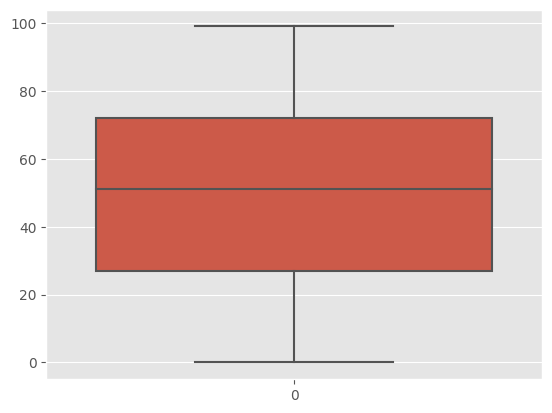

In [197]:
sns.boxplot(new_cust['past_3_years_bike_related_purchases'])

<Axes: >

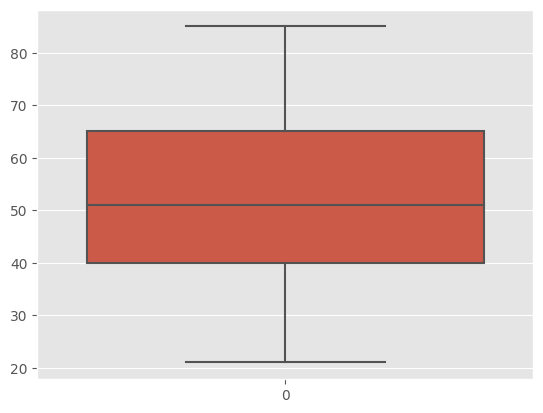

In [198]:
sns.boxplot(new_cust['age'])

<Axes: >

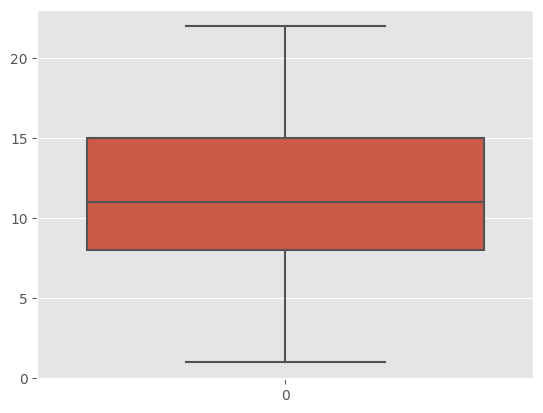

In [199]:
sns.boxplot(new_cust['tenure'])

<Axes: >

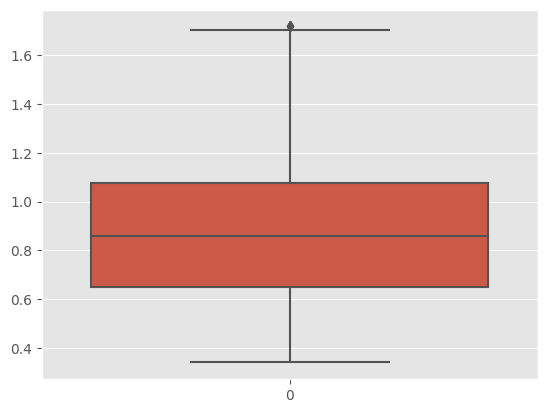

In [200]:
sns.boxplot(new_cust['Value'])

There are no significant outliers in numeric columns.

#6. Export data to csv file

In [201]:
new_cust.to_csv("New_Customer_List_cleaned.csv", index= False)